In [28]:
import ast
import pandas as pd
import torch

from data_processing import save_probabilities
from visualization import view_plateau

## Orthography vs Phonemic Transcriptions

In [29]:
nlexique = pd.read_csv('../data/nlexique.csv')
nlexique = nlexique[['lexeme', 'sg', 'gen']].rename(columns={'sg': 'phon'}).dropna().reset_index(drop=True)
nlexique

,lexeme,phon,gen
0,à-côté,akOte,m
1,à-coup,aku,m
2,à-peu-près,apØpʁɛ,m
3,à-pic,apik,m
4,à-plat,apla,m
...,...,...,...
30999,zurichois,zyʁikwa,m
31000,zydeco,zidəko,f
31001,zygoma,zigOma,m
31002,zygote,zigɔt,m


In [30]:
whitespace = nlexique[nlexique['lexeme'].str.contains(' ')]
whitespace

,lexeme,phon,gen
232,acid jazz,asiddʒaz,m
273,action painting,akʃœnpEntiŋ,f
542,agnus dei,agnusdEi,m
645,air bag,ɛʁbag,m
839,alter ego,altɛʁEgo,m
...,...,...,...
30807,wait and see,wEjtɛ̃ndsi,m
30811,wall street,wOlstʁit,b
30826,way of life,wɛjɔflajf,m
30856,world music,wɔʁldmyzik,f


In [31]:
checkpoint = torch.load('../saved_models/orthography_3gen.pth')
train_char_probs = checkpoint['train_char_prediction_probs']
valid_char_probs = checkpoint['valid_char_prediction_probs']

save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='w', set='validation')
save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/orthography_3gen.csv', mode='a', set='train')

File successfully written to ../results/orthography_3gen.csv.
File successfully written to ../results/orthography_3gen.csv.


In [32]:
or3_results = pd.read_csv('../results/orthography_3gen.csv')
or3_results

,Nouns,Class Probabilities,True Gender,Set
0,aa,"[('a', {'m': 0.5846313238143921, 'b': 0.195548...",m,validation
1,abaisse,"[('e', {'m': 0.38070330023765564, 'b': 0.49193...",f,validation
2,abatage,"[('e', {'m': 0.38070330023765564, 'b': 0.49193...",m,validation
3,abatis,"[('s', {'m': 0.6395576596260071, 'b': 0.168882...",m,validation
4,abattant,"[('t', {'m': 0.5417831540107727, 'b': 0.143282...",m,validation
...,...,...,...,...
30999,éwé,"[('é', {'m': 0.6133277416229248, 'b': 0.150891...",m,train
31000,être-là,"[('à', {'m': 0.6819036602973938, 'b': 0.091584...",m,train
31001,île,"[('e', {'m': 0.4012123644351959, 'b': 0.444344...",f,train
31002,îlette,"[('e', {'m': 0.46049100160598755, 'b': 0.41787...",f,train


In [33]:
or3_results['Noun_Length'] = or3_results['Nouns'].apply(len)
or3_results['Probabilities_Length'] = or3_results['Class Probabilities'].apply(lambda x: len(ast.literal_eval(x)))

filtered_df = or3_results[or3_results['Probabilities_Length'] != or3_results['Noun_Length']]

filtered_df

,Nouns,Class Probabilities,True Gender,Set,Noun_Length,Probabilities_Length


In [34]:
or3valid_preds = pd.read_csv('../results/nlexique_or3_predictions.csv')
or3valid_preds

,Word,Predicted Gender,True Gender,Class Probabilities,Set
0,n,m,m,"[('n', {'m': 0.31593793630599976, 'b': 0.41236...",validation
1,ut,m,m,"[('t', {'m': 0.46753841638565063, 'b': 0.10046...",validation
2,nu,m,m,"[('u', {'m': 0.2975066006183624, 'b': 0.156689...",validation
3,pi,m,m,"[('i', {'m': 0.813136875629425, 'b': 0.0658953...",validation
4,aa,f,m,"[('a', {'m': 0.4826546311378479, 'b': 0.281242...",validation
...,...,...,...,...,...
6196,post-impressionnisme,m,m,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
6197,anarcho-syndicaliste,b,b,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
6198,arrière-petite-nièce,f,f,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
6199,contre-révolutionnaire,b,b,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation


In [35]:
or3_correct = or3valid_preds[or3valid_preds['Predicted Gender'] == or3valid_preds['True Gender']]
or3_total = or3valid_preds

or3_percentage_correct = (or3_correct.shape[0] / or3_total.shape[0]) * 100
or3_percentage_correct

88.37284308982423

In [36]:
or3_incorrect = or3valid_preds[or3valid_preds['Predicted Gender'] != or3valid_preds['True Gender']]
or3_incorrect

,Word,Predicted Gender,True Gender,Class Probabilities,Set
4,aa,f,m,"[('a', {'m': 0.4826546311378479, 'b': 0.281242...",validation
9,obi,m,f,"[('i', {'m': 0.813136875629425, 'b': 0.0658953...",validation
11,ive,m,f,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
13,psy,m,b,"[('y', {'m': 0.6219619512557983, 'b': 0.124215...",validation
18,pop,m,b,"[('p', {'m': 0.4305112063884735, 'b': 0.206302...",validation
...,...,...,...,...,...
6169,persona non grata,b,f,"[('a', {'m': 0.4826546311378479, 'b': 0.281242...",validation
6172,reines-marguerite,m,f,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
6176,requiescat in pace,f,m,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation
6177,thalassothérapeute,m,b,"[('e', {'m': 0.3823751211166382, 'b': 0.569822...",validation


In [37]:
# [word for word in or3valid_preds['Word'].tolist() if word.endswith('ment')]
# [word for word in or3valid_preds['Word'].tolist() if word.endswith('tion')]

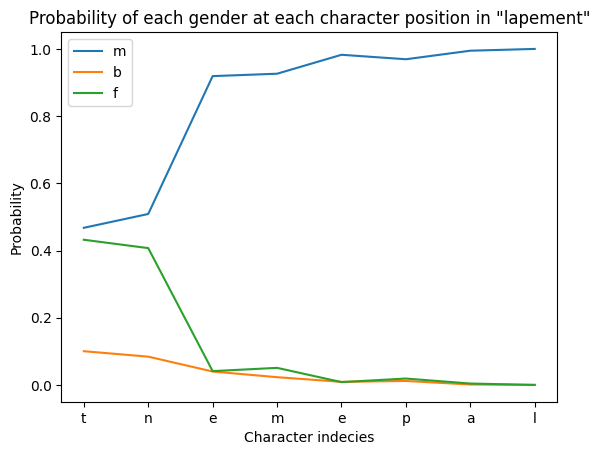

Probability values:
  [('t', {'m': 0.46753841638565063, 'b': 0.10046951472759247, 'f': 0.43199214339256287}), ('n', {'m': 0.508681058883667, 'b': 0.08422478288412094, 'f': 0.40709418058395386}), ('e', {'m': 0.9187798500061035, 'b': 0.04001924395561218, 'f': 0.041200943291187286}), ('m', {'m': 0.9258960485458374, 'b': 0.02317900024354458, 'f': 0.05092500150203705}), ('e', {'m': 0.982250988483429, 'b': 0.00924744363874197, 'f': 0.00850152038037777}), ('p', {'m': 0.9689509868621826, 'b': 0.011934598907828331, 'f': 0.0191144160926342}), ('a', {'m': 0.9943572878837585, 'b': 0.00137723283842206, 'f': 0.004265375901013613}), ('l', {'m': 0.9996761083602905, 'b': 0.00014369342534337193, 'f': 0.0001801870675990358})]
----------------------------------------------------------------------------------------------------



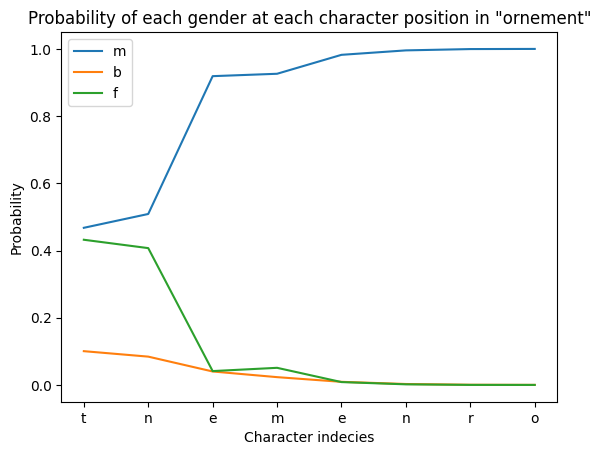

Probability values:
  [('t', {'m': 0.46753841638565063, 'b': 0.10046951472759247, 'f': 0.43199214339256287}), ('n', {'m': 0.508681058883667, 'b': 0.08422478288412094, 'f': 0.40709418058395386}), ('e', {'m': 0.9187798500061035, 'b': 0.04001924395561218, 'f': 0.041200943291187286}), ('m', {'m': 0.9258960485458374, 'b': 0.02317900024354458, 'f': 0.05092500150203705}), ('e', {'m': 0.982250988483429, 'b': 0.00924744363874197, 'f': 0.00850152038037777}), ('n', {'m': 0.9954812526702881, 'b': 0.002744838362559676, 'f': 0.0017739171162247658}), ('r', {'m': 0.9993736147880554, 'b': 0.0005157447303645313, 'f': 0.00011073191126342863}), ('o', {'m': 0.9998201727867126, 'b': 0.00014851739979349077, 'f': 3.138467582175508e-05})]
----------------------------------------------------------------------------------------------------



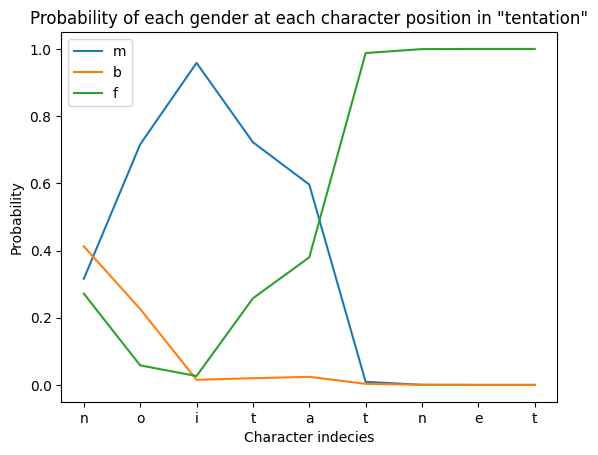

Probability values:
  [('n', {'m': 0.31593793630599976, 'b': 0.4123668074607849, 'f': 0.2716952860355377}), ('o', {'m': 0.7158830165863037, 'b': 0.22596456110477448, 'f': 0.058152440935373306}), ('i', {'m': 0.9583486914634705, 'b': 0.015192784368991852, 'f': 0.026458533480763435}), ('t', {'m': 0.7222535610198975, 'b': 0.019969796761870384, 'f': 0.2577766478061676}), ('a', {'m': 0.5962173938751221, 'b': 0.024139367043972015, 'f': 0.3796432316303253}), ('t', {'m': 0.009167988784611225, 'b': 0.003239634446799755, 'f': 0.9875923991203308}), ('n', {'m': 0.0003296111535746604, 'b': 0.0003470249939709902, 'f': 0.9993233680725098}), ('e', {'m': 7.694285159232095e-05, 'b': 2.2465246729552746e-05, 'f': 0.9999005794525146}), ('t', {'m': 5.298014002619311e-05, 'b': 5.5699470976833254e-05, 'f': 0.9998912811279297})]
----------------------------------------------------------------------------------------------------



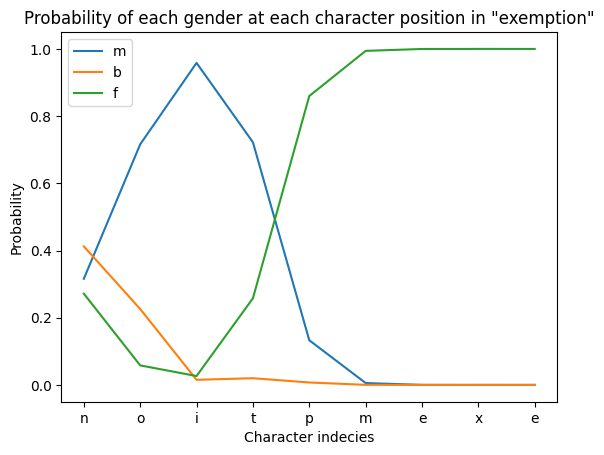

Probability values:
  [('n', {'m': 0.31593793630599976, 'b': 0.4123668074607849, 'f': 0.2716952860355377}), ('o', {'m': 0.7158830165863037, 'b': 0.22596456110477448, 'f': 0.058152440935373306}), ('i', {'m': 0.9583486914634705, 'b': 0.015192784368991852, 'f': 0.026458533480763435}), ('t', {'m': 0.7222535610198975, 'b': 0.019969796761870384, 'f': 0.2577766478061676}), ('p', {'m': 0.1330113410949707, 'b': 0.007253879681229591, 'f': 0.8597347140312195}), ('m', {'m': 0.005616714246571064, 'b': 0.0002963332226499915, 'f': 0.9940869808197021}), ('e', {'m': 0.00018738961080089211, 'b': 4.100738078705035e-05, 'f': 0.9997716546058655}), ('x', {'m': 5.401141243055463e-05, 'b': 1.871727181423921e-05, 'f': 0.999927282333374}), ('e', {'m': 8.123335283016786e-05, 'b': 2.1215575543465093e-05, 'f': 0.9998975992202759})]


In [38]:
view_plateau('lapement', or3valid_preds)
print('-' * 100 + '\n')
view_plateau('ornement', or3valid_preds)
print('-' * 100 + '\n')
view_plateau('tentation', or3valid_preds)
print('-' * 100 + '\n')
view_plateau('exemption', or3valid_preds)

## Suffix vs Non-suffix Words

In [39]:
echantinom = pd.read_csv('../data/Echantinom-full-20210902.csv')
echantinom = echantinom[~echantinom['lemma'].isin(nlexique[nlexique['gen'] == 'b']['lexeme'])][['lemma', 'gen']]
# nlexique = nlexique_data[(~nlexique_data['lexeme'].isin(echantinom['lemma'])) & (nlexique_data['gen'] != 'b')][['lexeme', 'gen']]

In [40]:
checkpoint = torch.load('../saved_models/nlexique-GenderLSTM.pth')
train_char_probs = checkpoint['train_char_prediction_probs']
valid_char_probs = checkpoint['valid_char_prediction_probs']

save_probabilities(valid_char_probs, nlexique[['lexeme', 'gen']], '../results/nlexique_results.csv', mode='w', set='validation')
save_probabilities(train_char_probs, nlexique[['lexeme', 'gen']], '../results/nlexique_results.csv', mode='a', set='train')

File successfully written to ../results/nlexique_results.csv.
File successfully written to ../results/nlexique_results.csv.


In [41]:
echantinom_preds = pd.read_csv('../results/echantinom_predictions.csv')
echantinom_preds

,Word,Predicted Gender,True Gender,Class Probabilities,Set
0,an,m,m,"[('n', {'m': 0.400600403547287, 'f': 0.5993995...",test
1,as,m,m,"[('s', {'m': 0.774683952331543, 'f': 0.2253160...",test
2,bi,m,m,"[('i', {'m': 0.8157699704170227, 'f': 0.184230...",test
3,té,m,m,"[('é', {'m': 0.549670398235321, 'f': 0.4503296...",test
4,los,m,m,"[('s', {'m': 0.774683952331543, 'f': 0.2253160...",test
...,...,...,...,...,...
4529,approvisionnement,m,m,"[('t', {'m': 0.741456925868988, 'f': 0.2585430...",test
4530,sous-alimentation,f,f,"[('n', {'m': 0.400600403547287, 'f': 0.5993995...",test
4531,cul-de-basse-fosse,m,m,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test
4532,transsubstantiation,f,f,"[('n', {'m': 0.400600403547287, 'f': 0.5993995...",test


In [42]:
correct = echantinom_preds[echantinom_preds['Predicted Gender'] == echantinom_preds['True Gender']]
total = echantinom_preds

percentage_correct = (correct.shape[0] / total.shape[0]) * 100
percentage_correct


90.7587119541244

In [43]:
incorrect = echantinom_preds[echantinom_preds['Predicted Gender'] != echantinom_preds['True Gender']]
incorrect

,Word,Predicted Gender,True Gender,Class Probabilities,Set
5,foi,m,f,"[('i', {'m': 0.8157699704170227, 'f': 0.184230...",test
11,mer,m,f,"[('r', {'m': 0.5540698766708374, 'f': 0.445930...",test
15,clé,m,f,"[('é', {'m': 0.549670398235321, 'f': 0.4503296...",test
16,are,f,m,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test
20,eau,m,f,"[('u', {'m': 0.3103860020637512, 'f': 0.689613...",test
...,...,...,...,...,...
4418,archimandrite,f,m,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test
4442,aphrodisiaque,f,m,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test
4512,perpendiculaire,m,f,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test
4517,transatlantique,f,m,"[('e', {'m': 0.5474574565887451, 'f': 0.452542...",test


In [47]:
# [word for word in echantinom_preds['Word'].tolist() if word.endswith('age')]

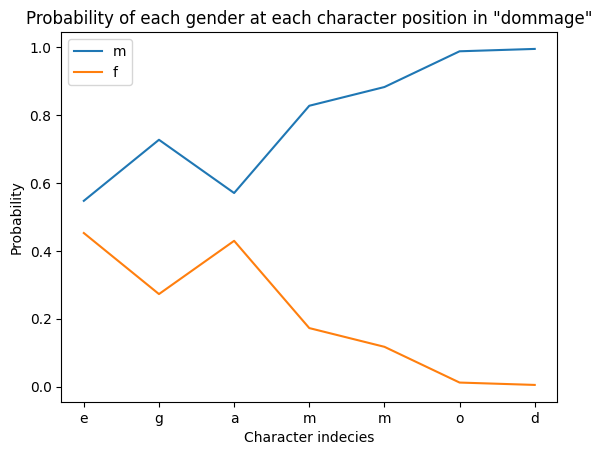

Probability values:
  [('e', {'m': 0.5474574565887451, 'f': 0.4525425434112549}), ('g', {'m': 0.7274580001831055, 'f': 0.27254197001457214}), ('a', {'m': 0.5704848170280457, 'f': 0.4295152723789215}), ('m', {'m': 0.8277459740638733, 'f': 0.17225396633148193}), ('m', {'m': 0.8829681277275085, 'f': 0.11703184992074966}), ('o', {'m': 0.9883506298065186, 'f': 0.011649436317384243}), ('d', {'m': 0.9953241944313049, 'f': 0.004675835836678743})]
----------------------------------------------------------------------------------------------------



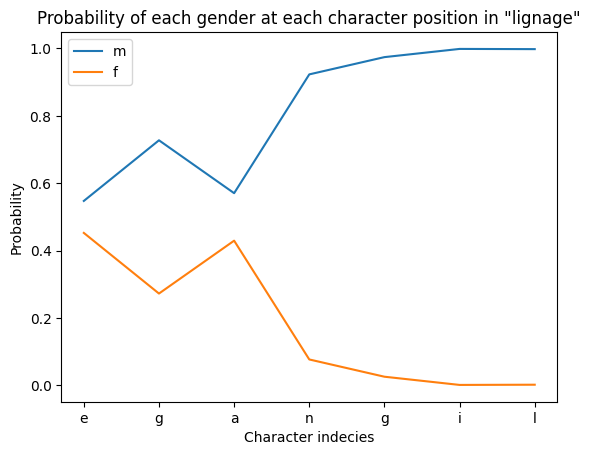

Probability values:
  [('e', {'m': 0.5474574565887451, 'f': 0.4525425434112549}), ('g', {'m': 0.7274580001831055, 'f': 0.27254197001457214}), ('a', {'m': 0.5704848170280457, 'f': 0.4295152723789215}), ('n', {'m': 0.9231032133102417, 'f': 0.07689675688743591}), ('g', {'m': 0.9743409752845764, 'f': 0.025658991187810898}), ('i', {'m': 0.9986940026283264, 'f': 0.0013060357887297869}), ('l', {'m': 0.9980691075325012, 'f': 0.0019308672053739429})]


In [45]:
view_plateau('dommage', echantinom_preds)
print('-' * 100 + '\n')
view_plateau('lignage', echantinom_preds)

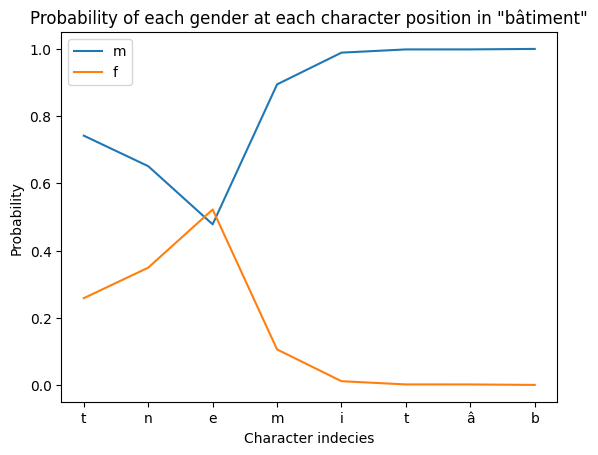

Probability values:
  [('t', {'m': 0.741456925868988, 'f': 0.25854307413101196}), ('n', {'m': 0.6507676243782043, 'f': 0.34923234581947327}), ('e', {'m': 0.4779774248600006, 'f': 0.5220226049423218}), ('m', {'m': 0.8938865661621094, 'f': 0.10611338913440704}), ('i', {'m': 0.9882412552833557, 'f': 0.011758732609450817}), ('t', {'m': 0.9977937936782837, 'f': 0.0022062654606997967}), ('â', {'m': 0.9978784322738647, 'f': 0.0021216270979493856}), ('b', {'m': 0.99928218126297, 'f': 0.0007178436499089003})]
----------------------------------------------------------------------------------------------------



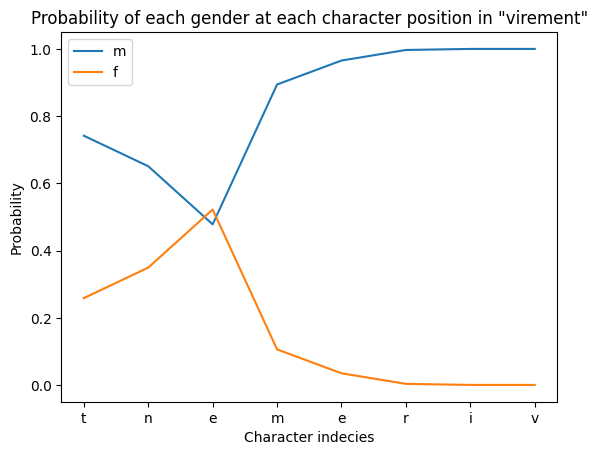

Probability values:
  [('t', {'m': 0.741456925868988, 'f': 0.25854307413101196}), ('n', {'m': 0.6507676243782043, 'f': 0.34923234581947327}), ('e', {'m': 0.4779774248600006, 'f': 0.5220226049423218}), ('m', {'m': 0.8938865661621094, 'f': 0.10611338913440704}), ('e', {'m': 0.9650624990463257, 'f': 0.03493751585483551}), ('r', {'m': 0.9964809417724609, 'f': 0.0035190111957490444}), ('i', {'m': 0.9996122717857361, 'f': 0.0003878010029438883}), ('v', {'m': 0.9996219873428345, 'f': 0.00037793934461660683})]
----------------------------------------------------------------------------------------------------



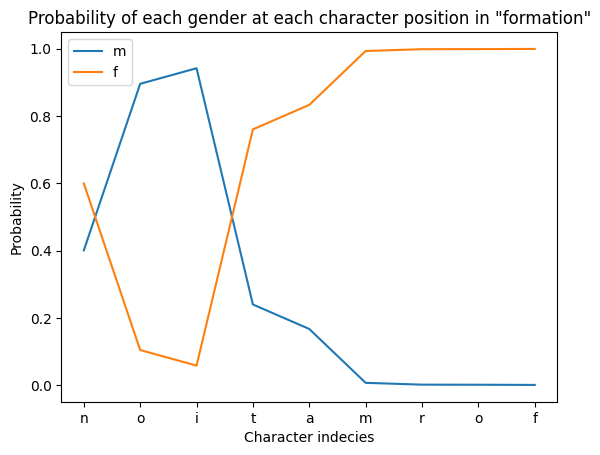

Probability values:
  [('n', {'m': 0.400600403547287, 'f': 0.5993995666503906}), ('o', {'m': 0.8955442905426025, 'f': 0.10445568710565567}), ('i', {'m': 0.9417701959609985, 'f': 0.05822977051138878}), ('t', {'m': 0.2398015856742859, 'f': 0.7601984143257141}), ('a', {'m': 0.16703574359416962, 'f': 0.8329642415046692}), ('m', {'m': 0.006970884744077921, 'f': 0.9930290579795837}), ('r', {'m': 0.0015985858626663685, 'f': 0.9984014630317688}), ('o', {'m': 0.001332128536887467, 'f': 0.99866783618927}), ('f', {'m': 0.0007772337994538248, 'f': 0.9992227554321289})]
----------------------------------------------------------------------------------------------------



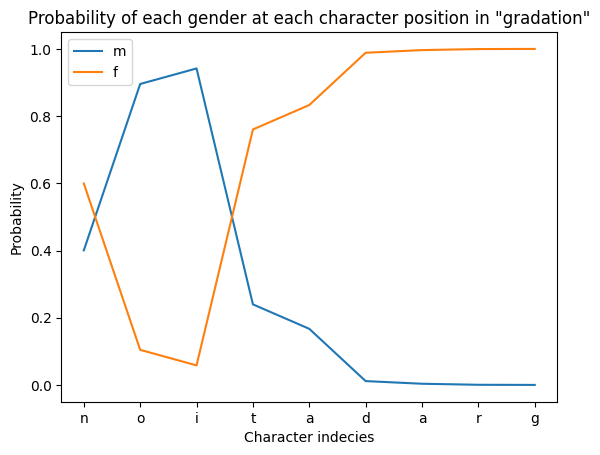

Probability values:
  [('n', {'m': 0.400600403547287, 'f': 0.5993995666503906}), ('o', {'m': 0.8955442905426025, 'f': 0.10445568710565567}), ('i', {'m': 0.9417701959609985, 'f': 0.05822977051138878}), ('t', {'m': 0.2398015856742859, 'f': 0.7601984143257141}), ('a', {'m': 0.16703574359416962, 'f': 0.8329642415046692}), ('d', {'m': 0.011497294530272484, 'f': 0.9885027408599854}), ('a', {'m': 0.0036084805615246296, 'f': 0.9963914752006531}), ('r', {'m': 0.0005178477149456739, 'f': 0.9994822144508362}), ('g', {'m': 0.00010996439232258126, 'f': 0.9998899698257446})]


In [46]:
view_plateau('bâtiment', echantinom_preds)
print('-' * 100 + '\n')
view_plateau('virement', echantinom_preds)
print('-' * 100 + '\n')
view_plateau('formation', echantinom_preds)
print('-' * 100 + '\n')
view_plateau('gradation', echantinom_preds)